In [14]:
data_div2k_train_dir = '../../../datasets/superres/div2k/DIV2K_train_HR'
data_div2k_val_dir = '../../../datasets/superres/div2k/DIV2K_valid_HR'

data_flickr_dir = '../../../datasets/superres/flickr2k/Flickr2K/Flickr2K_HR'

In [79]:
import glob
import numpy as np
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import torch
import random

class div2kflickr2k_getdataset(torch.utils.data.Dataset):
    def __init__(self, img_size= 32, type_= 'train', delta=0, img_dir_div2k= None, img_dir_flickr2k= None, num_samples= None):
        super(div2kflickr2k_getdataset, self).__init__()
        
        self.type_ = type_

        if self.type_== 'train':
            img_list = glob.glob(f"{img_dir_div2k}/*.png") + glob.glob(f"{img_dir_flickr2k}/*.png")
        else:
            img_list = glob.glob(f"{img_dir_div2k}/*.png")

        print(f'total images found in: {self.type_} -> {len(img_list)}')
        
        np.random.seed(10)
        np.random.shuffle(img_list)
        
        if num_samples==None:num_samples=len(img_list)
            
        if len(img_list)<num_samples:
            print(f'WARNING -> Dataset: len(images) < num_samples -> num_samples will be neglected !!!')
            self.img_list= img_list
        else:
            self.img_list= img_list[:num_samples]
        
        self.delta= 0
        
        self.mean =-self.delta/(1-self.delta)
        self.std=1/(1-self.delta)
        
        self.transform = torchvision.transforms.Compose([
                                    #torchvision.transforms.Resize([img_size, img_size]),
                                    torchvision.transforms.RandomCrop(img_size),
                                    torchvision.transforms.Grayscale(1),
                                    torchvision.transforms.ToTensor(),
                                    torchvision.transforms.Normalize((self.mean,), (self.std,))])
        
    def __len__(self):
        return len(self.img_list)
    
    def __getitem__(self, idx):
        img= self.transform(Image.fromarray((255*plt.imread(self.img_list[idx])).astype('uint8')))
        
        mode = random.randint(0, 7)
        img= self.augment_img(img.permute(1,2,0), mode=mode).permute(2, 0, 1) ## augmentation is applied for train, val, test datasets -> because our goal: evaluate on other datasets
        output = img, torch.tensor(1) 
        return output

    def augment_img(self, img, mode=0): #img: HWC
        '''Kai Zhang (github: https://github.com/cszn)
        '''
        if mode == 0:
            return img
        elif mode == 1:
            return torch.flipud(torch.rot90(img))
        elif mode == 2:
            return torch.flipud(img)
        elif mode == 3:
            return torch.rot90(img, k=3)
        elif mode == 4:
            return torch.flipud(torch.rot90(img, k=2))
        elif mode == 5:
            return torch.rot90(img)
        elif mode == 6:
            return torch.rot90(img, k=2)
        elif mode == 7:
            return torch.flipud(torch.rot90(img, k=3))


In [75]:
def div2kflickr2k(img_size, delta, num_samples_train, num_samples_valtest):

    data_div2k_train_dir = '../../../datasets/superres/div2k/DIV2K_train_HR'
    data_div2k_val_dir = '../../../datasets/superres/div2k/DIV2K_valid_HR'
    data_flickr_dir = '../../../datasets/superres/flickr2k/Flickr2K/Flickr2K_HR'

    trainset = div2kflickr2k_getdataset(img_size, 'train', delta, data_div2k_train_dir, data_flickr_dir, num_samples_train)
    valset= div2kflickr2k_getdataset(img_size, 'val', delta, data_div2k_val_dir, None, num_samples_valtest)
    testset= valset
    
    return trainset, valset, testset

In [76]:
img_size= 256
delta= 0
num_samples_train= 3450
num_samples_valtest= 100

trainset, valset, testset = div2kflickr2k(img_size, delta, num_samples_train, num_samples_valtest)

total images found in: train -> 3450
total images found in: val -> 100


dataset lenths : 3450 | 100 | 100


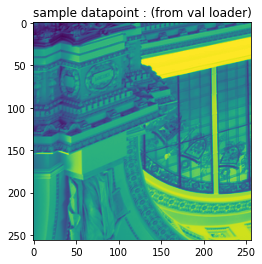

dataset value range :  0.0 1.0


In [77]:
import sys
sys.path.append('../')
from modules.data_utils import return_dataloaders

train_loader, val_loader, test_loader = return_dataloaders(trainset, valset, testset, batch_size_train= 32, drop_last_val_test= False, batch_size_valtest= 25)

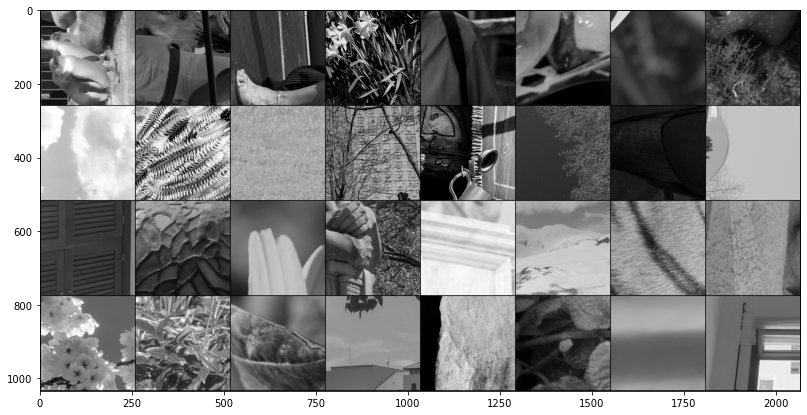

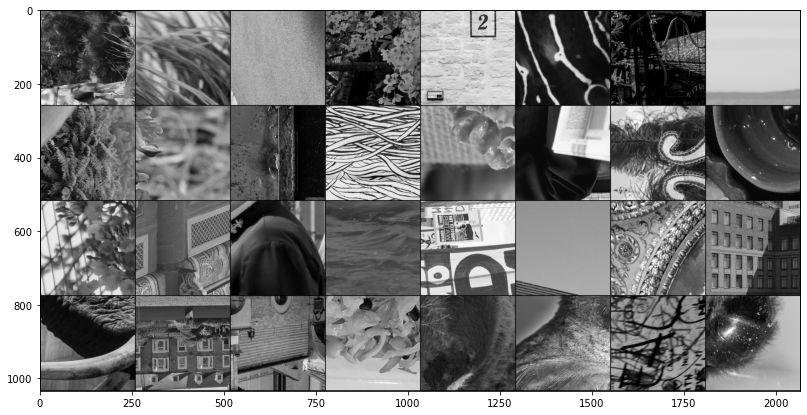

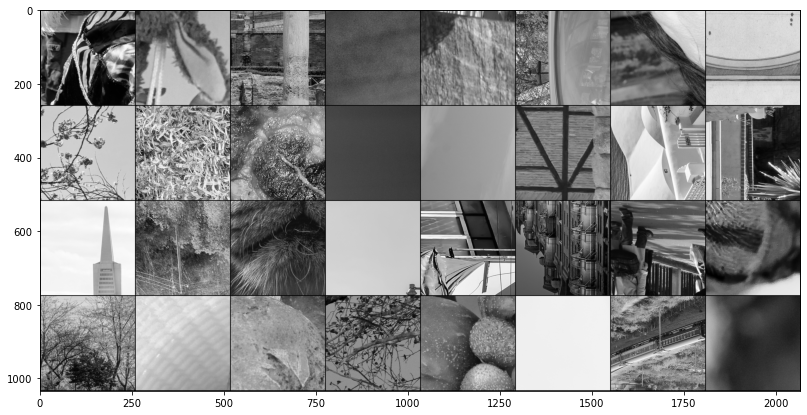

In [78]:
import cv2
for idx, (x, y) in enumerate(train_loader):
    if idx > 2:break
    grid_img = torchvision.utils.make_grid(x, nrow=8)
    plt.figure(figsize= (15, 7))
    plt.imshow(grid_img.permute(1,2,0).numpy())
    plt.show()

#### Verify the datasets, dataloaders

total images found in: train -> 3450
total images found in: val -> 100
dataset lenths : 3450 | 100 | 100


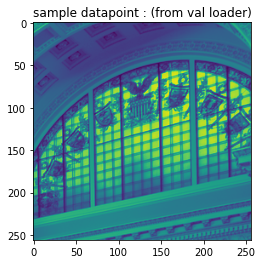

dataset value range :  0.0 1.0


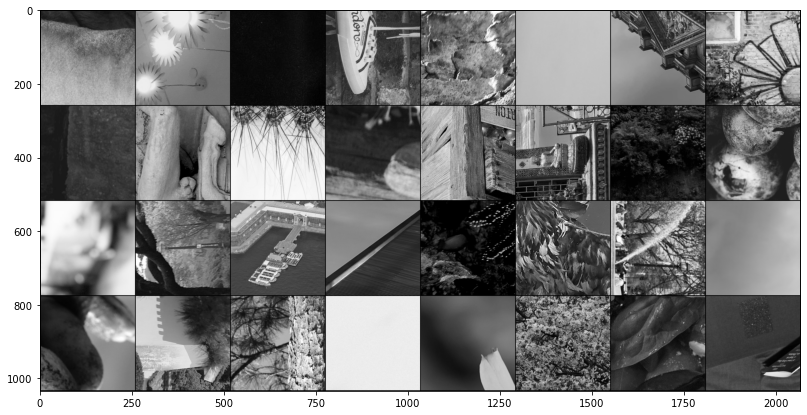

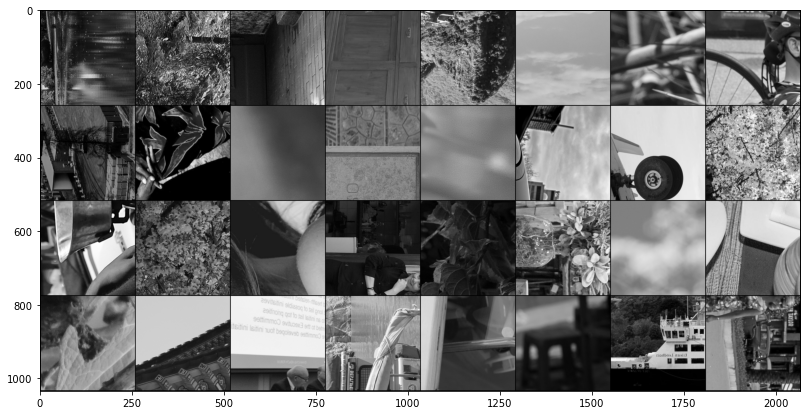

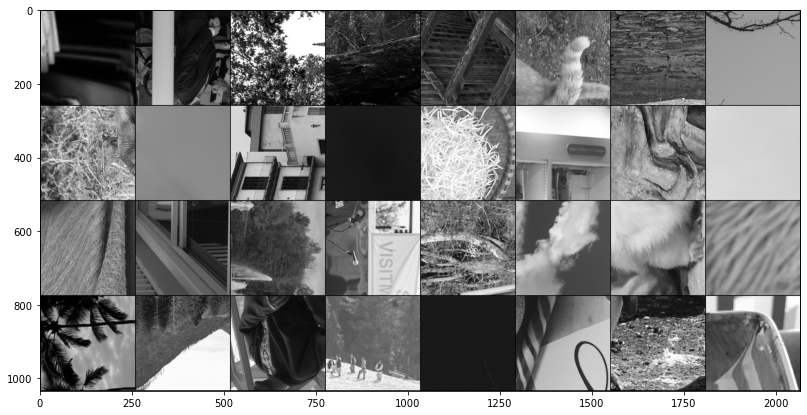

In [3]:
import sys
sys.path.append('../')
from modules.data_utils import return_dataloaders
from modules.datasets import *

img_size= 256
delta= 0
num_samples_train= 3450
num_samples_valtest= 100

trainset, valset, testset = div2kflickr2k(img_size, delta, num_samples_train, num_samples_valtest)
train_loader, val_loader, test_loader = return_dataloaders(trainset, valset, testset, batch_size_train= 32, drop_last_val_test= False, batch_size_valtest= 25)

import cv2
for idx, (x, y) in enumerate(train_loader):
    if idx > 2:break
    grid_img = torchvision.utils.make_grid(x, nrow=8)
    plt.figure(figsize= (15, 7))
    plt.imshow(grid_img.permute(1,2,0).numpy())
    plt.show()